In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive

from scipy.spatial.distance import euclidean
# from fastdtw import fastdtw

np.random.seed(7)
plt.style.use('default')


########## import dataset ##########
drive.mount('/content/drive')
path='/content/drive/MyDrive/DataSets/xlsx/5XAUUSD.csv'
# dataset = pd.read_csv(path,usecols=[1,2,3,4])
dataset_5 = pd.read_csv(path)

path='/content/drive/MyDrive/DataSets/xlsx/15XAUUSD.csv'
dataset_15 = pd.read_csv(path)

path='/content/drive/MyDrive/DataSets/xlsx/30XAUUSD.csv'
dataset_30 = pd.read_csv(path)

path='/content/drive/MyDrive/DataSets/xlsx/60XAUUSD.csv'
dataset_60 = pd.read_csv(path)

path='/content/drive/MyDrive/DataSets/xlsx/240XAUUSD.csv'
dataset_240 = pd.read_csv(path)

chartName = "XAUUSD 5 Min"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
dataset_5 = dataset_5.rename({'Time':'Date','|PD|':'PD'},axis=1)
dataset_15 = dataset_15.rename({'Time':'Date','|PD|':'PD'},axis=1)
dataset_30 = dataset_30.rename({'Time':'Date','|PD|':'PD'},axis=1)
dataset_60 = dataset_60.rename({'Time':'Date','|PD|':'PD'},axis=1)
dataset_240 = dataset_240.rename({'Time':'Date','|PD|':'PD'},axis=1)



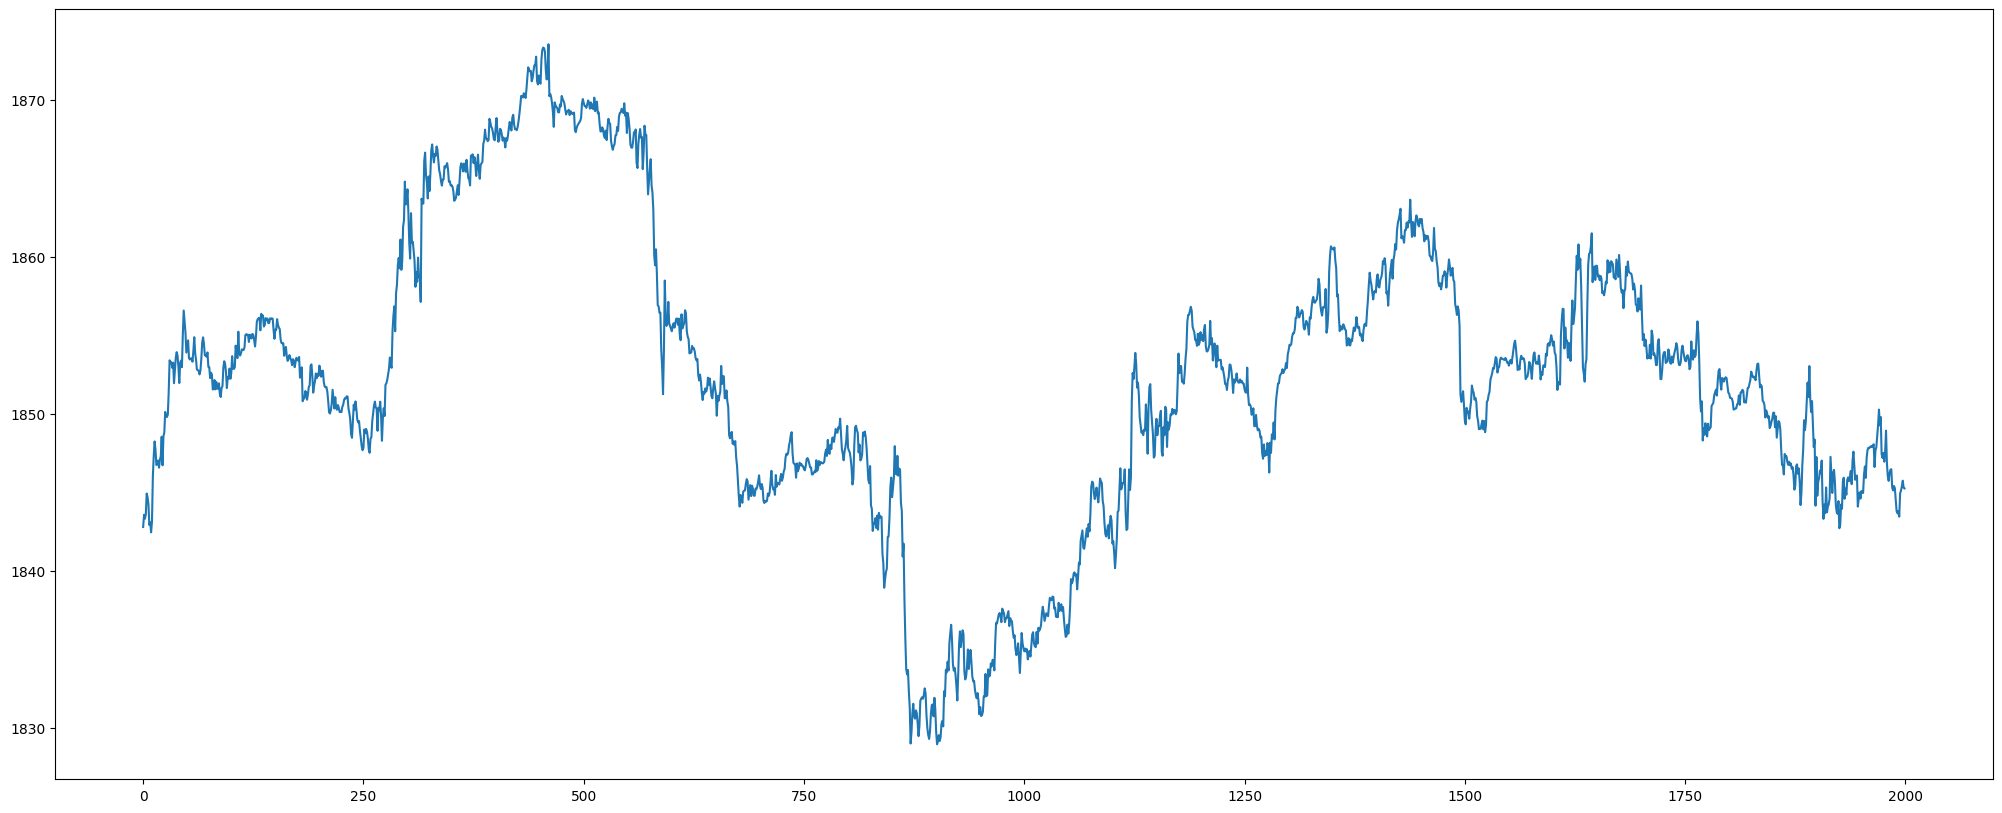

In [50]:
# dataset = dataset.head(20)
dataset_5.shape
plt.figure(figsize=(25,10))
plt.plot(dataset_5['Close'] )

In [51]:
dataset_5['Date'].head() , dataset_5['Date'].tail()

(0    6/6/2022 19:00
 1    6/6/2022 18:55
 2    6/6/2022 18:50
 3    6/6/2022 18:45
 4    6/6/2022 18:40
 Name: Date, dtype: object,
 1995    5/26/2022 8:35
 1996    5/26/2022 8:30
 1997    5/26/2022 8:25
 1998    5/26/2022 8:20
 1999    5/26/2022 8:15
 Name: Date, dtype: object)

In [52]:
dataset_5 = dataset_5.reindex(index = dataset_5.index[::-1])
dataset_15 = dataset_15.reindex(index = dataset_15.index[::-1])
dataset_30 = dataset_30.reindex(index = dataset_30.index[::-1])
dataset_60 = dataset_60.reindex(index = dataset_60.index[::-1])
dataset_240 = dataset_240.reindex(index = dataset_240.index[::-1])


In [53]:
dataset_5['Average'] = dataset_5[['Open','Close','Low','High']].mean(axis=1)
dataset_15['Average'] = dataset_15[['Open','Close','Low','High']].mean(axis=1)
dataset_30['Average'] = dataset_30[['Open','Close','Low','High']].mean(axis=1)
dataset_60['Average'] = dataset_60[['Open','Close','Low','High']].mean(axis=1)
dataset_240['Average'] = dataset_240[['Open','Close','Low','High']].mean(axis=1)

OHLC_avg_5 = dataset_5[['Open','Close','Low','High']].mean(axis=1)
OHLC_avg_15 = dataset_15[['Open','Close','Low','High']].mean(axis=1)
OHLC_avg_30 = dataset_30[['Open','Close','Low','High']].mean(axis=1)
OHLC_avg_60 = dataset_60[['Open','Close','Low','High']].mean(axis=1)
OHLC_avg_240 = dataset_240[['Open','Close','Low','High']].mean(axis=1)

# sklearn density


In [54]:
# OHLC_avg = OHLC_avg.flatten()
OHLC_avg_5.shape  , OHLC_avg_15.shape , OHLC_avg_30.shape , OHLC_avg_60.shape  , OHLC_avg_240.shape  

((2000,), (2000,), (2000,), (2000,), (2000,))

In [55]:
from sklearn.neighbors import KernelDensity

In [56]:
y_d = np.linspace(OHLC_avg_5.min(), OHLC_avg_5.max(), 2000)

In [57]:
x_d = np.linspace(OHLC_avg_5.min(), OHLC_avg_5.max(), OHLC_avg_5.shape[0])
x_d

array([1829.065     , 1829.08714482, 1829.10928964, ..., 1873.28821036,
       1873.31035518, 1873.3325    ])

In [58]:
x_5 = OHLC_avg_5
x_15 = OHLC_avg_15
x_30 = OHLC_avg_30
x_60 = OHLC_avg_60
x_240 = OHLC_avg_240

In [59]:
from scipy.stats import norm
x_d = np.linspace(OHLC_avg_5.min(), OHLC_avg_5.max(), 2000)
x_ticks = np.around(np.linspace(OHLC_avg_5.min(), OHLC_avg_5.max(), 40),4)

In [60]:
x_ticks

array([1829.065 , 1830.2001, 1831.3351, 1832.4702, 1833.6053, 1834.7403,
       1835.8754, 1837.0104, 1838.1455, 1839.2806, 1840.4156, 1841.5507,
       1842.6858, 1843.8208, 1844.9559, 1846.091 , 1847.226 , 1848.3611,
       1849.4962, 1850.6312, 1851.7663, 1852.9013, 1854.0364, 1855.1715,
       1856.3065, 1857.4416, 1858.5767, 1859.7117, 1860.8468, 1861.9819,
       1863.1169, 1864.252 , 1865.3871, 1866.5221, 1867.6572, 1868.7922,
       1869.9273, 1871.0624, 1872.1974, 1873.3325])

In [61]:
from matplotlib.ticker import FormatStrFormatter

In [62]:
kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
kde_5 = kde.fit(x_5[:, None])

logprob_5 = kde_5.score_samples(x_d[:, None])

A5 = np.exp(logprob_5)
B5 = sorted(A5)

# C = B[-1]
# C=B[0]
# C = np.quantile(B,0.75)
C5 = np.percentile(B5,80)


# -----------------

kde_15 = kde.fit(x_15[:, None])

logprob_15 = kde_15.score_samples(x_d[:, None])

A15 = np.exp(logprob_15)
B15 = sorted(A15)
C15 = np.percentile(B15,80)


# -----------------

kde_30 = kde.fit(x_30[:, None])

logprob_30 = kde_30.score_samples(x_d[:, None])

A30 = np.exp(logprob_30)
B30 = sorted(A30)
C30 = np.percentile(B30,80)





# -----------------

kde_60 = kde.fit(x_60[:, None])

logprob_60 = kde_60.score_samples(x_d[:, None])

A60 = np.exp(logprob_60)
B60 = sorted(A60)
C60 = np.percentile(B60,80)




# -----------------

kde_240 = kde.fit(x_240[:, None])

logprob_240 = kde_240.score_samples(x_d[:, None])

A240 = np.exp(logprob_240)
B240 = sorted(A240)
C240 = np.percentile(B240,80)






<ipython-input-62-c5c093239356>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  kde_5 = kde.fit(x_5[:, None])
<ipython-input-62-c5c093239356>:17: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  kde_15 = kde.fit(x_15[:, None])
<ipython-input-62-c5c093239356>:28: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  kde_30 = kde.fit(x_30[:, None])
<ipython-input-62-c5c093239356>:42: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  kde_60 = kde.fit(x_60[:, No

(array([1829.065 , 1830.2001, 1831.3351, 1832.4702, 1833.6053, 1834.7403,
        1835.8754, 1837.0104, 1838.1455, 1839.2806, 1840.4156, 1841.5507,
        1842.6858, 1843.8208, 1844.9559, 1846.091 , 1847.226 , 1848.3611,
        1849.4962, 1850.6312, 1851.7663, 1852.9013, 1854.0364, 1855.1715,
        1856.3065, 1857.4416, 1858.5767, 1859.7117, 1860.8468, 1861.9819,
        1863.1169, 1864.252 , 1865.3871, 1866.5221, 1867.6572, 1868.7922,
        1869.9273, 1871.0624, 1872.1974, 1873.3325]),
 [Text(1829.065, 0, '1829.07'),
  Text(1830.2001, 0, '1830.20'),
  Text(1831.3351, 0, '1831.34'),
  Text(1832.4702, 0, '1832.47'),
  Text(1833.6053, 0, '1833.61'),
  Text(1834.7403, 0, '1834.74'),
  Text(1835.8754, 0, '1835.88'),
  Text(1837.0104, 0, '1837.01'),
  Text(1838.1455, 0, '1838.15'),
  Text(1839.2806, 0, '1839.28'),
  Text(1840.4156, 0, '1840.42'),
  Text(1841.5507, 0, '1841.55'),
  Text(1842.6858, 0, '1842.69'),
  Text(1843.8208, 0, '1843.82'),
  Text(1844.9559, 0, '1844.96'),
  Text(1

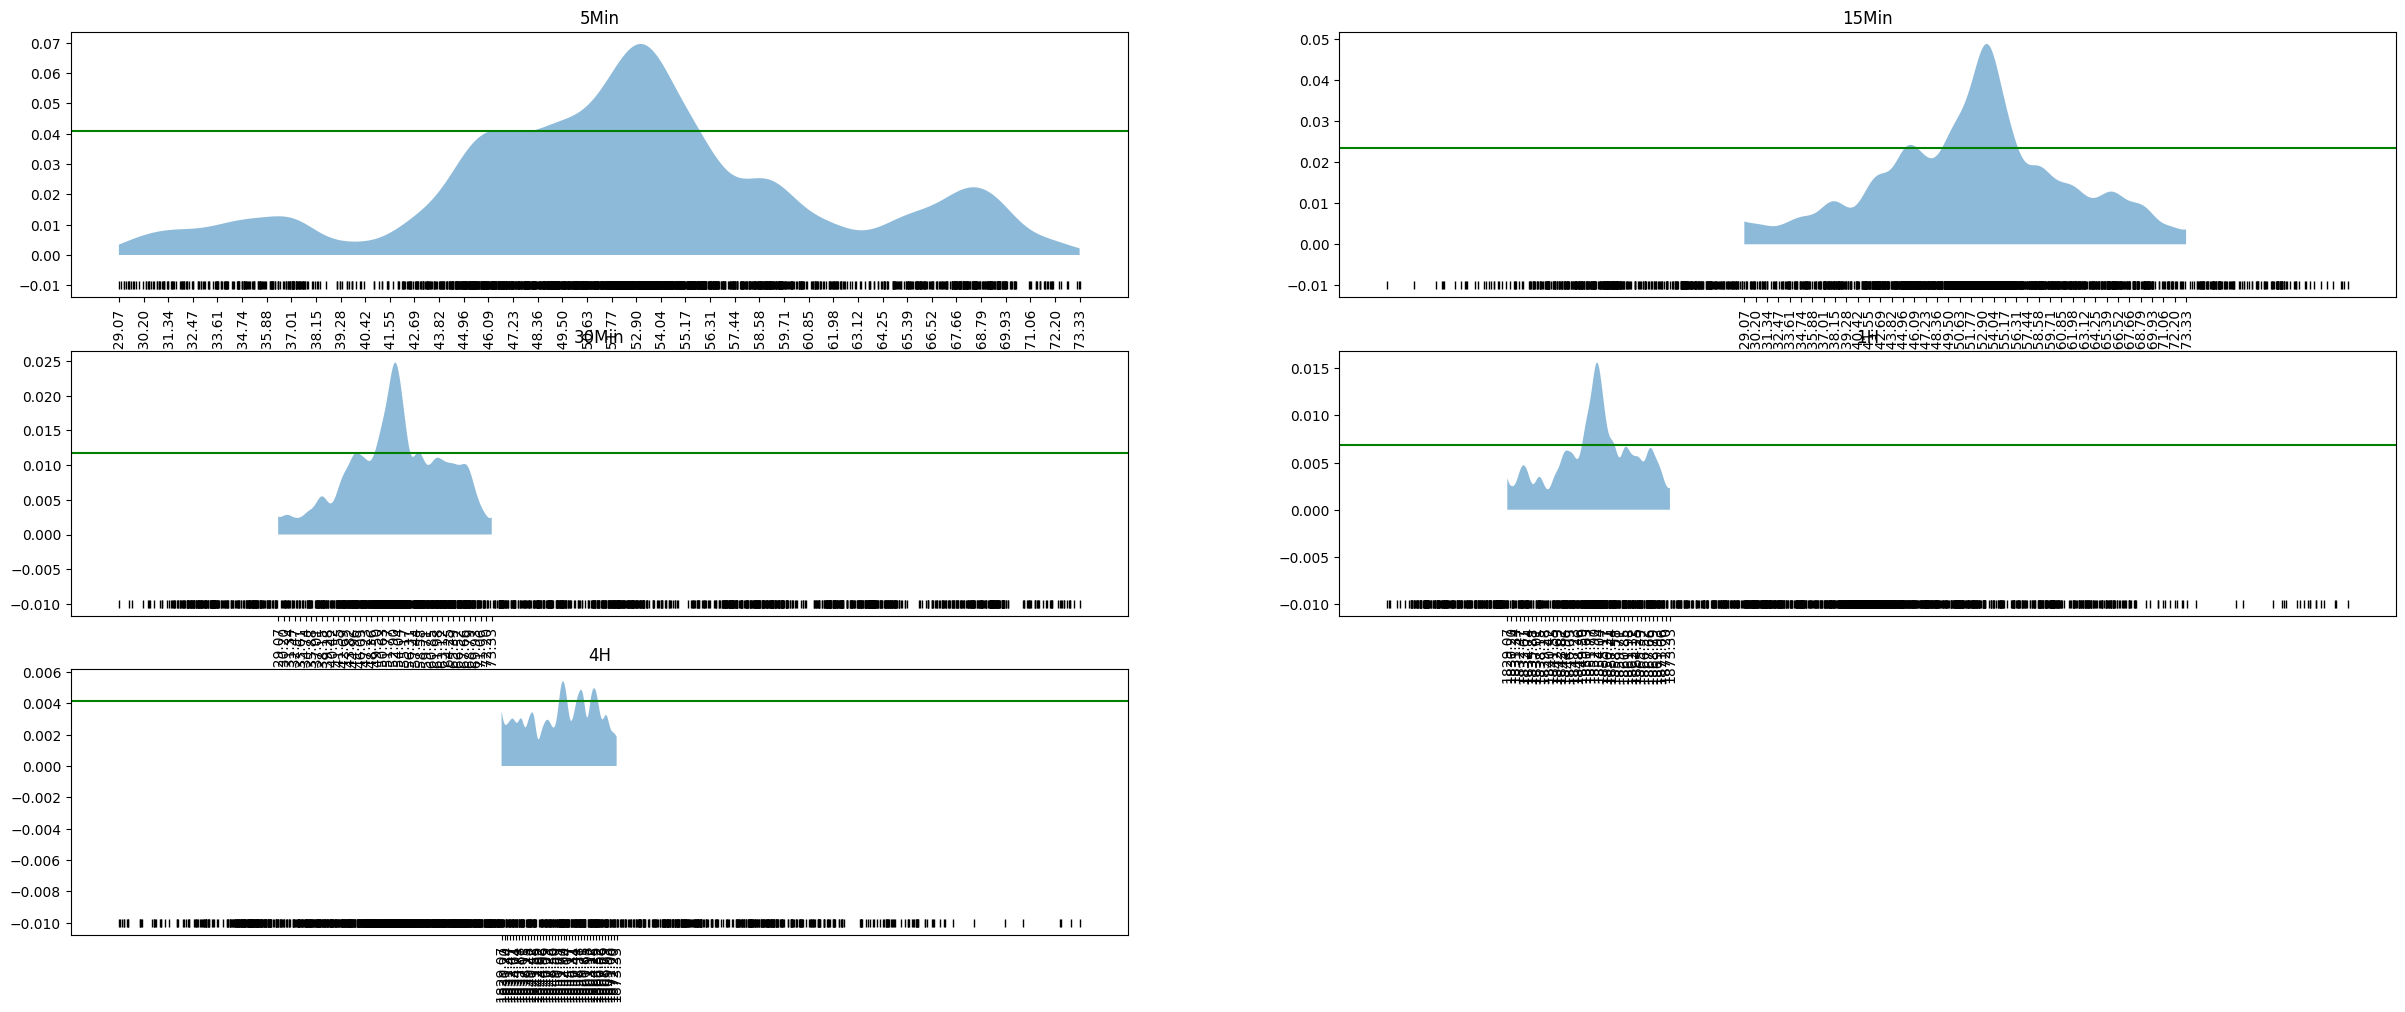

In [63]:
plt.figure(figsize=(30,20))


plt.subplot(5, 2, 1)
plt.gca().set_title("5Min")
plt.fill_between(x_d, A5, alpha=0.5)
plt.plot(x_5, np.full_like(x_5, -0.01), '|k', markeredgewidth=1)

plt.axhline(y=C5, color='g', linestyle='-')
plt.xticks(x_ticks)
plt.xticks(rotation=90)


plt.subplot(5, 2, 2)
plt.gca().set_title("15Min")
plt.fill_between(x_d, A15, alpha=0.5)
plt.plot(x_15, np.full_like(x_15, -0.01), '|k', markeredgewidth=1)

plt.axhline(y=C15, color='g', linestyle='-')
plt.xticks(x_ticks)
plt.xticks(rotation=90)



plt.subplot(5, 2, 3)
plt.gca().set_title("30Min")


# plt.figure(figsize=(10,4))
plt.fill_between(x_d, A30, alpha=0.5)
plt.plot(x_30, np.full_like(x_30, -0.01), '|k', markeredgewidth=1)

plt.axhline(y=C30, color='g', linestyle='-')
plt.xticks(x_ticks)
plt.xticks(rotation=90)






plt.subplot(5, 2, 4)
plt.gca().set_title("1H")
# plt.figure(figsize=(10,4))
plt.fill_between(x_d, A60, alpha=0.5)
plt.plot(x_60, np.full_like(x_60, -0.01), '|k', markeredgewidth=1)

plt.axhline(y=C60, color='g', linestyle='-')
plt.xticks(x_ticks)
plt.xticks(rotation=90)




plt.subplot(5, 2, 5)
plt.gca().set_title("4H")

# plt.figure(figsize=(10,4))
plt.fill_between(x_d, A240, alpha=0.5)
plt.plot(x_240, np.full_like(x_240, -0.01), '|k', markeredgewidth=1)

plt.axhline(y=C240, color='g', linestyle='-')
plt.xticks(x_ticks)
plt.xticks(rotation=90)

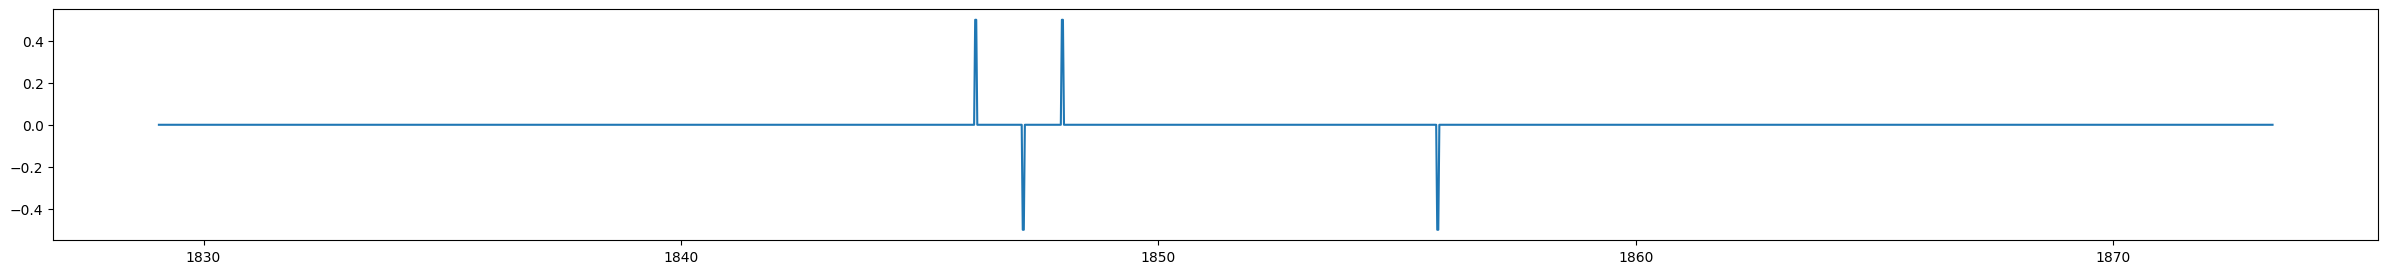

In [64]:
z5= np.gradient((A5 > C5).astype(int))
z15= np.gradient((A15 > C15).astype(int))
z30= np.gradient((A30 > C30).astype(int))
z60= np.gradient((A60 > C60).astype(int))
z240= np.gradient((A240 > C240).astype(int))

plt.figure(figsize=(30,3))
plt.plot(x_d , z5)

In [65]:
# def split(l, n):
#   """ Yield n successive chunks from l. Pads extra spaces with None
#   """
#   return list(zip(*zip(*[iter(l)]*n)))

In [66]:
g5 = z5[::2]
gi5 = np.where(g5)[0]

g15 = z15[::2]
gi15 = np.where(g15)[0]

g30 = z30[::2]
gi30 = np.where(g30)[0]

g60 = z60[::2]
gi60 = np.where(g60)[0]

g240 = z240[::2]
gi240 = np.where(g240)[0]

In [67]:
len(gi60)

2

In [68]:
def split(l,n):
  return np.split(l,n)

In [69]:
x5 = np.split(gi5,2) if len(gi5) > 2  else [gi5]
x15 = np.split(gi15,2) if len(gi15) > 2  else [gi15]
x30 = np.split(gi30,2) if len(gi30) > 2  else [gi30]
x60 = np.split(gi60,2) if len(gi60) > 2  else [gi60]
x240 = np.split(gi240,2) if len(gi240) > 2  else [gi240]



# x5 =  np.split(gi5,2)
# x15 = np.split(gi15,2)
# x30 = np.split(gi30,2)
# x60 = np.split(gi60,2)
# x240 = np.split(gi240,2)

In [70]:
gi60

array([459, 659])

In [71]:
x5

[array([386, 409]), array([427, 605])]

In [72]:
x15

[array([363, 391]), array([447, 619])]

In [73]:
x60

[array([459, 659])]

In [74]:
x240

[array([499, 570, 652]), array([717, 773, 837])]

In [75]:
ts5 = list(map(lambda t: (x_d[t[0]*2], x_d[t[1]*2]), x5))
ts15 = list(map(lambda t: (x_d[t[0]*2], x_d[t[1]*2]), x15))
ts30 = list(map(lambda t: (x_d[t[0]*2], x_d[t[1]*2]), x30))
ts60 = list(map(lambda t: (x_d[t[0]*2], x_d[t[1]*2]), x60))
ts240 = list(map(lambda t: (x_d[t[0]*2], x_d[t[1]*2]), x240))

In [76]:
for t in ts5:
  print(t[0] , t[1])

1846.1608029014508 1847.1794647323661
1847.9766783391697 1855.860235117559


In [77]:
# z5.tolist().index(0.5)

In [78]:
# i=0
# i = z5.tolist().index(0.5)
# j = z5[i:].tolist().index(-0.5)

# i , j +i

In [79]:
# i=0
# S=set()
# for _ in range(len(z5)):
#   if 0.5 not in z5[i:]: break
#   i = z5[i:].tolist().index(0.5)
#   if -0.5 not in z5[i:]: break
#   j = z5[i:].tolist().index(-0.5) +i
#   if i == j:
#     break;
#   S.add((i , j))
#   i=j
  

# S

In [80]:
# x_d[z5!=0] 
# , x_d[z15!=0] , x_d[z30!=0] , x_d[z60!=0]  , x_d[z240!=0]

In [81]:
# dens5 = x_d[z5!=0]
# dens15 = x_d[z15!=0]
# dens30 = x_d[z30!=0]
# dens60 = x_d[z60!=0]
# dens240 = x_d[z240!=0]

x_axis = np.arange(0,2000)

def plotLines_5():
  for i , x in enumerate(ts5) :
    if i==0:
      plt.fill_between(x_axis, x[0], x[1], color='y', alpha=0.5 , label = "5 Min")
    else:
      plt.fill_between(x_axis, x[0], x[1], color='y', alpha=0.5)
    
    

def plotLines_15():
  for i,x in enumerate(ts15) :
    if i==0:
      plt.fill_between(x_axis, x[0], x[1], color='b', alpha=0.5 , label = "15 Min")
    else:
      plt.fill_between(x_axis, x[0], x[1], color='b', alpha=0.5)
    
  # for x in dens15:
  #   plt.axhline(y=x, color='b', linestyle='--', linewidth=1)    

def plotLines_30():
  for i, x in enumerate(ts30) :
    if i==0:
      plt.fill_between(x_axis, x[0], x[1], color='g', alpha=0.5 , label = "30 Min")
    else:
      plt.fill_between(x_axis, x[0], x[1], color='g', alpha=0.5)
    
  # for x in dens30:
  #   plt.axhline(y=x, color='g', linestyle='--', linewidth=1)    

def plotLines_60():
  for i,x in enumerate(ts60):
    if i==0:
      plt.fill_between(x_axis, x[0], x[1], color='r', alpha=0.5 , label = "1H")
    else:
      plt.fill_between(x_axis, x[0], x[1], color='r', alpha=0.5)
    
  # for x in dens60:
  #   plt.axhline(y=x, color='r', linestyle='--', linewidth=1)            

def plotLines_240():
  for i,x in enumerate(ts240) :
    if i==0:
      plt.fill_between(x_axis, x[0], x[1], color='gray', alpha=0.5 , label = "4H")
    else:
      plt.fill_between(x_axis, x[0], x[1], color='gray', alpha=0.5)
    
  # for x in dens240:
  #   plt.axhline(y=x, color='b', linestyle='--', linewidth=1)            




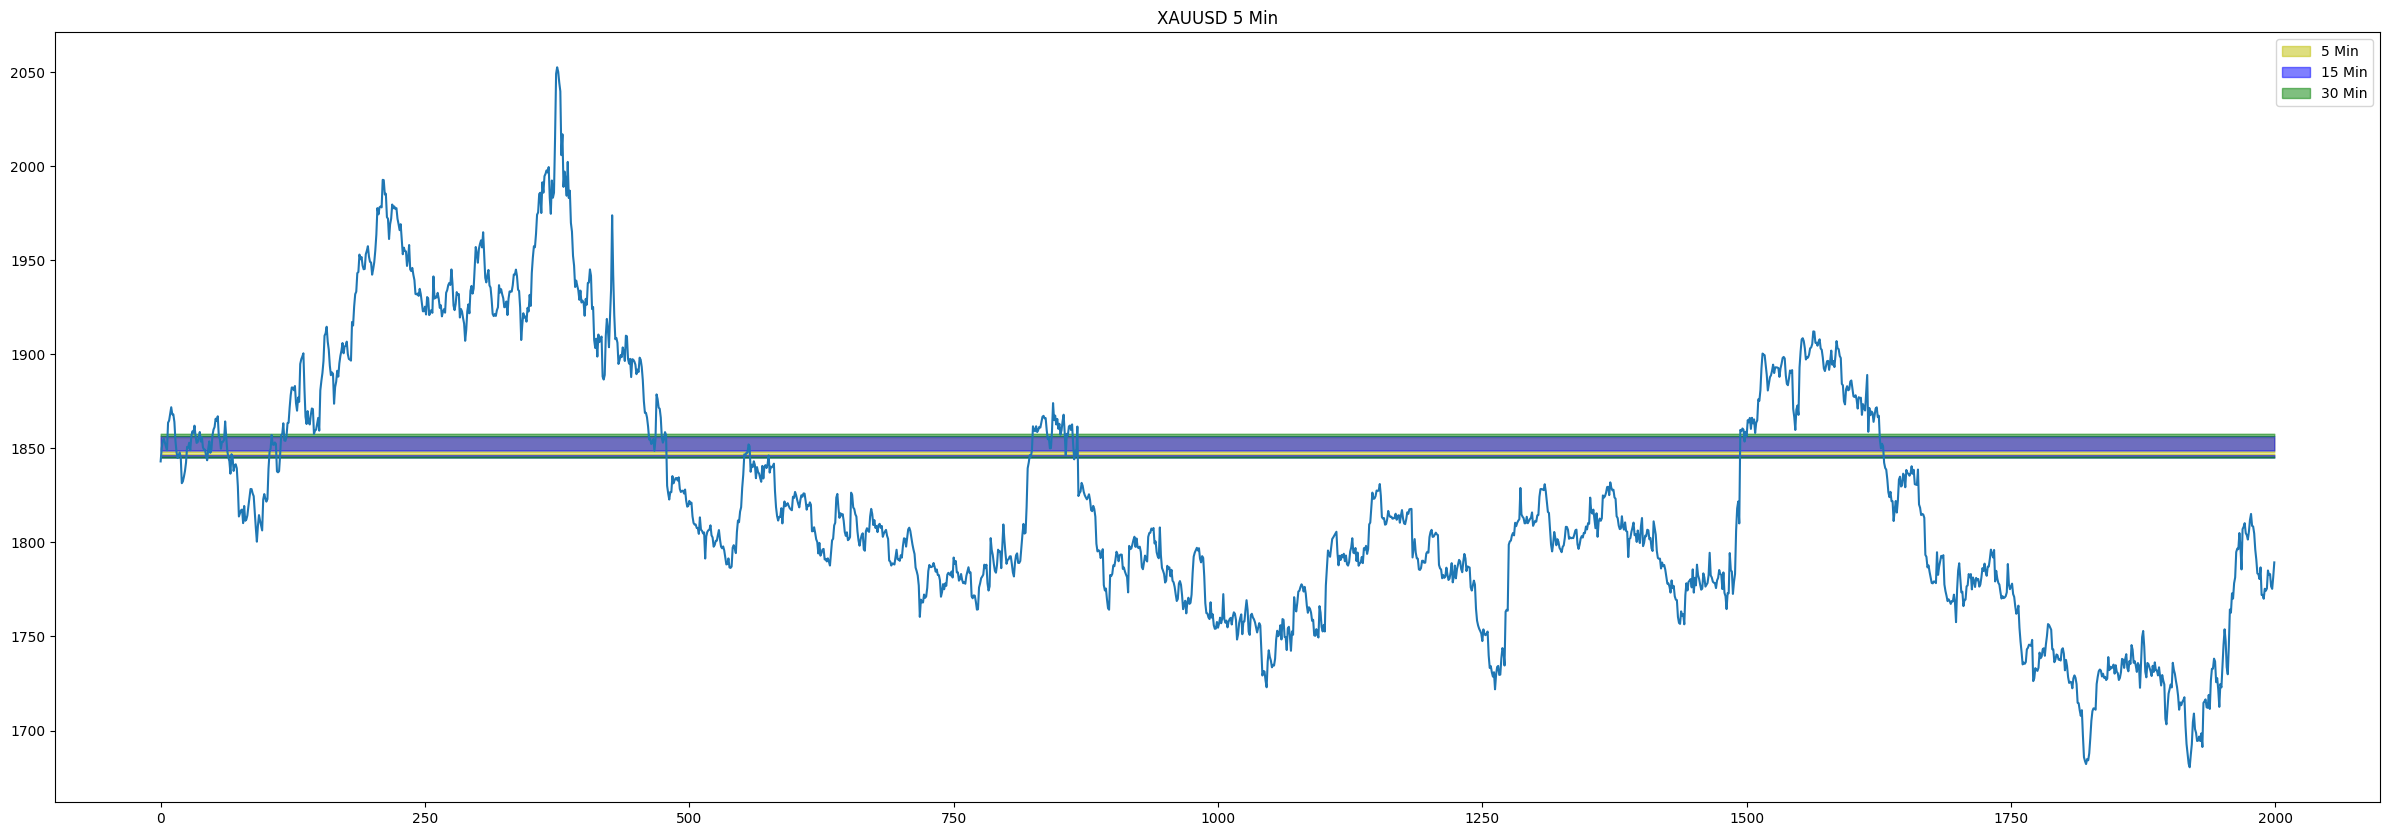

In [82]:
plt.figure(figsize=(30,10))
# plt.title(chartName)

plt.gca().set_title(chartName)
plt.plot(dataset_240['Close'])

plotLines_5()
plotLines_15()
plotLines_30()
# plotLines_60()
# plotLines_240()
plt.legend()